In [ ]:
SUMMARY OF RESULTS



SCATTERPLOTS

Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


To generate a random float number between any two numbers, we can use random.uniform(start,stop)

In [1]:
#Dependencies
import requests 
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import numpy as np

In [2]:
#####TEST (PERTH CITY) to see json info, and define variables to extract for y-axis: Temperature(F), Latitude Humidity, Cloudiness, Windspeed, x-axis: Latitude####

#Request and get URL, and transform to JSON. 
#For units, use "imperial" as farenheit has been requested in project.
deg="\xb0" #degree sign
city="sydney"
units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
######Define variable "weather" and read the json file
weather=requests.get(url).json()
####Print the output of JSON formatted
#print(json.dumps(weather, indent=4, sort_keys=True))

####VARIABLES AND ITS VALUES FOR Y-AXIS###
#if set to imperial, units as follows
#Temp (F) 
print(weather["main"]["temp"], "Farenheit")
#Latitude Humidity
print(weather["main"]["humidity"], "% Humidity")
#Cloudiness (%)
print(weather["clouds"]["all"], "% Cloudiness")
#Windspeed (miles/hr)
print(weather["wind"]["speed"], "miles/hr")
# print("miles/hr")
####VARIABLES AND ITS VALUES FOR X-AXIS###
#latitude
print(weather["coord"]["lat"],deg,"latitude")
###OTHER VARIABLES####
#longitude
print(weather["coord"]["lon"],deg,"longitude")

77.83 Farenheit
61 % Humidity
0 % Cloudiness
16.11 miles/hr
-33.8679 ° latitude
151.2073 ° longitude


In [3]:
########JSON DATA #########
#base_url
base_url="http://api.openweathermap.org/data/2.5/weather?"

#######################

#Set up empty lists (for filling in in the for loop). Avoid using variables with same names as in API
 # Latitude, Longitude, Temperature(F), Latitude Humidity, Cloudiness, Windspeed
lat_list=[] #Latitude (°)
long_list=[] #Longitude (°)
city_list=[] #city name
temp_list=[] #Temperature(F)
lat_hum_list=[] #Latitude Humidity
cloud_list=[] #Cloudiness
winds_list=[] #windspeed


for x in range(20):

    #Random pick of latitude between -90 and 90 deg
    #Save latitudes into list "lat_list" 
    latitude=random.uniform(-90,90)
    lat_list.append(latitude)
    #Random pick of latitude between -180 and 180 deg
    #Save latitudes into list "lat_list" 
    longitude=random.uniform(-180,180)
    long_list.append(longitude)
    #Find the nearest city based on the random latitude and longitude variable
    city=citipy.nearest_city(latitude, longitude).city_name
    city_list.append(city)
    print(city)
    ####FOR THE CITY (in each loop), find variable values via JSON Data
    #Variable for query url. "imperial":farenheit, "metric":celcius, "":kelvin. 
    #Use "imperial" as farenheit has been requested in project.
    units="imperial"
    # print(city)
    #query url
    query_url=f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    ######Define variable "weather" and read the json file
    weather=requests.get(query_url).json()
    try:
        temperature=weather["main"]["temp"]
        print(f" Temperature: {temperature}") 
        temp_list.append(temperature)  
    except KeyError:
        print(f"Likely the temp, main did not work in the API site")
        temperature=np.nan
        temp_list.append(temperature)
        # tempearture=int(None)
        pass   

    #Find latitude humidity (%)
    try:
        lat_hum=weather["main"]["humidity"]
        print(f" Lat Humidity: {lat_hum}")
        lat_hum_list.append(lat_hum)
    except KeyError:
        print(f"Likely the lat_hum, main did not work in the API site")
        lat_hum=np.nan
        lat_hum_list.append(lat_hum)
        # lat_hum_list=int(None)
        pass

    #Cloudiness (%)
    try:
        cloud=weather["clouds"]["all"]
        print(f" Cloud %: {cloud}")
        cloud_list.append(cloud)
    except KeyError:
        print(f"Likely the clouds did not work in the API site")
        cloud=np.nan
        cloud_list.append(cloud)
        # cloud=int(None)
        pass

    #Windspeed (miles/hr)
    try:
        winds=weather["wind"]["speed"]
        print(f" Wind Speed: {winds}")
        winds_list.append(winds)
    except KeyError:
        print(f"Likely the winds did not work in the API site")
        winds=np.nan
        winds_list.append(cloud)
       

####PRINT THE FOLLOWING TO TEST #####
# print(lat_list)
# print(long_list)
# print(city_list)
# print(temp_list)
# print(lat_hum_list)
# print(cloud_list)
# print(winds_list)

tasiilaq
 Temperature: 14
 Lat Humidity: 48
 Cloud %: 0
 Wind Speed: 2.3
shelburne
 Temperature: 14.47
 Lat Humidity: 92
 Cloud %: 90
 Wind Speed: 5.12
margate
 Temperature: 38.25
 Lat Humidity: 72
 Cloud %: 98
 Wind Speed: 4
sur
 Temperature: 71.35
 Lat Humidity: 41
 Cloud %: 0
 Wind Speed: 15.14
nabire
 Temperature: 79.43
 Lat Humidity: 83
 Cloud %: 100
 Wind Speed: 0.96
lebu
 Temperature: 54.68
 Lat Humidity: 93
 Cloud %: 14
 Wind Speed: 6.76
pevek
 Temperature: -22.29
 Lat Humidity: 87
 Cloud %: 9
 Wind Speed: 3.4
jamestown
 Temperature: 15.8
 Lat Humidity: 79
 Cloud %: 90
 Wind Speed: 3.44
flinders
 Temperature: 78.53
 Lat Humidity: 62
 Cloud %: 74
 Wind Speed: 1.01
albany
 Temperature: 10.62
 Lat Humidity: 49
 Cloud %: 0
 Wind Speed: 15.01
saint george
 Temperature: 34.68
 Lat Humidity: 86
 Cloud %: 1
 Wind Speed: 5.75
grand river south east
Likely the temp, main did not work in the API site
Likely the lat_hum, main did not work in the API site
Likely the clouds did not work in t

In [4]:
#Create a dataframe from the lists created 
weather_dict={
    "City Name":city_list, 
    "Latitude":lat_list, 
    "Longitude":long_list,
    "Temperature": temp_list,
    "Latitude Humidity": lat_hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": winds_list
    }

weather_data = pd.DataFrame(weather_dict)
#Drop rows where there is missing data "NaN" 
weather1_data = weather_data.dropna()
weather_data
weather1_data

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,tasiilaq,78.192482,-34.430832,14.00,48.0,0.0,2.30
1,shelburne,39.700003,-64.221663,14.47,92.0,90.0,5.12
2,margate,-40.299672,41.819722,38.25,72.0,98.0,4.00
3,sur,16.662830,63.708454,71.35,41.0,0.0,15.14
4,nabire,-6.122214,137.377118,79.43,83.0,100.0,0.96
5,lebu,-34.957668,-95.284519,54.68,93.0,14.0,6.76
6,pevek,83.305061,174.521772,-22.29,87.0,9.0,3.40
7,jamestown,-43.472153,-9.579136,15.80,79.0,90.0,3.44
8,flinders,-33.644537,129.792483,78.53,62.0,74.0,1.01
9,albany,-88.360325,116.015174,10.62,49.0,0.0,15.01


Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Create dataframe for northern hemisphere cities using boolean, test latitude > 0 degrees
#Create dataframe for northern hemisphere cities using boolean, test latitude < 0 degrees

#Plot a scatter graph and do the linear regression (line of best fit and Pearson's r value)

Scatter plots of 500 cities

Temperature (F) vs. Latitude

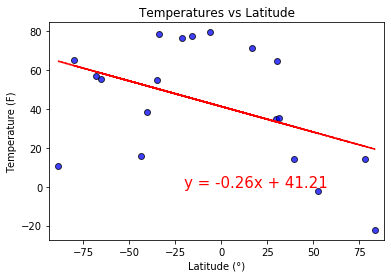

The r-squared value is: 0.20


In [5]:
###Create scatter plot of Temperature(F) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Temperatures vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")


Humidity (%) vs. Latitude

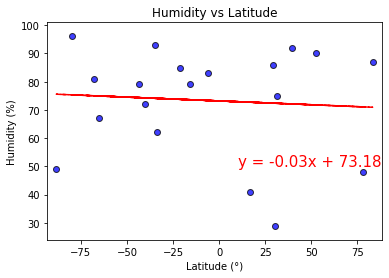

The r-squared value is: 0.01


In [6]:
###Create scatter plot of Humidity (%) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Latitude Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Cloudiness (%) vs. Latitude


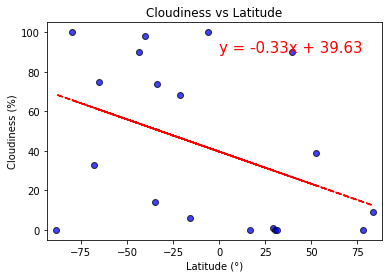

The r-squared value is: 0.17


In [7]:
###Create scatter plot of Cloudiness (%) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(0,90),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Wind Speed (mph) vs. Latitude

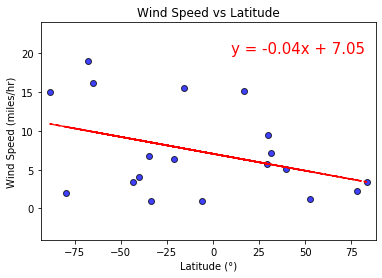

The r-squared value is: 0.15


In [8]:
###Create scatter plot of Wind Speed (miles/hr) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (miles/hr)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Second requirement: Run a linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

Northern Hemisphere - Temperature (F) vs. Latitude

Southern Hemisphere - Temperature (F) vs. Latitude 

Northern Hemisphere - Humidity (%) vs. Latitude

Southern Hemisphere - Humidity (%) vs. Latitude

Northern Hemisphere - Cloudiness (%) vs. Latitude

Southern Hemisphere - Cloudiness (%) vs. Latitude

Northern Hemisphere - Wind Speed (mph) vs. Latitude

Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [9]:
#Create dataframe from main dataframe "weather_data" and filter for only northern hemisphere city data (Latitude>0°)
north_df=weather1_data[weather1_data["Latitude"]>=0]
north_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,tasiilaq,78.192482,-34.430832,14.00,48.0,0.0,2.30
1,shelburne,39.700003,-64.221663,14.47,92.0,90.0,5.12
3,sur,16.662830,63.708454,71.35,41.0,0.0,15.14
6,pevek,83.305061,174.521772,-22.29,87.0,9.0,3.40
10,saint george,29.440287,-49.158658,34.68,86.0,1.0,5.75
12,ajdabiya,30.064153,19.118893,64.80,29.0,0.0,9.42
15,beringovskiy,52.727719,177.519389,-2.07,90.0,39.0,1.25
19,lasa,31.575137,93.601271,35.40,75.0,0.0,7.11


In [10]:
#Create dataframe from main dataframe "weather_data" and filter for only southern hemisphere city data (Latitude<0°)
south_df=weather1_data[weather1_data["Latitude"]<0]
south_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
2,margate,-40.299672,41.819722,38.25,72.0,98.0,4.00
4,nabire,-6.122214,137.377118,79.43,83.0,100.0,0.96
5,lebu,-34.957668,-95.284519,54.68,93.0,14.0,6.76
7,jamestown,-43.472153,-9.579136,15.80,79.0,90.0,3.44
8,flinders,-33.644537,129.792483,78.53,62.0,74.0,1.01
9,albany,-88.360325,116.015174,10.62,49.0,0.0,15.01
13,atuona,-15.666995,-142.582820,77.40,79.0,6.0,15.59
14,mataura,-67.958276,-160.593941,57.00,81.0,33.0,18.99
16,port alfred,-79.665187,49.550601,64.99,96.0,100.0,1.99
17,voh,-21.427941,164.005575,76.14,85.0,68.0,6.44


Northern Hemisphere - Temperature (F) vs. Latitude 

Southern Hemisphere - Temperature (F) vs. Latitude 

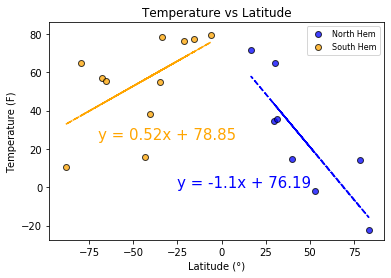

Northern Hemisphere: The r-squared value is: 0.70
Southern Hemisphere: The r-squared value is: 0.33


In [37]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Temperature (F) vs Latitude(°)

#Use dataframe from previous cell: north_df
north_df 
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Temperature"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Temperature"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="orange", edgecolors="black", alpha=0.75,label="South Hem"); #south hem
# # The y limits of our scatter plot
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #north hem
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #south hem
# # The x limits of our scatter plot 
# plt.xlim(min(x1_values)-5, max(x1_values)+5) #north hem
# plt.xlim(min(x2_values)-5, max(x2_values)+5) #south hem
# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orange") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(-25,0),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-70,25),fontsize=15,color="orange") #south hem

#Label title, x-axis and y-axis
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")

#Plot legend
plt.legend(loc='upper right',fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

#####################################
# #EXPERIMENT

# # Add the linear regression equation and line to plot

# x2_values = south_df["Latitude"] #south hem
# y2_values = south_df["Temperature"] #south hem
# (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
# regress_values2 = x2_values * slope2 + intercept2 #south hem
# line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
# #Make a scatter plot
# #south hem
# s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="orange", edgecolors="black", alpha=0.75,label="South Hem"); 

# # #Plot linear regression model
# plt.plot(x2_values,regress_values2,"--",color="orange") #south hem

# #Annotate the linear eqn y=mx+c
# plt.annotate(line_eq2,(-70,40),fontsize=15,color="orange") #south hem

# #Label title, x-axis and y-axis
# plt.title("Temperature vs Latitude")
# plt.xlabel("Latitude (°)")
# plt.ylabel("Temperature (F)")

# #Plot legend
# plt.legend(loc='upper right',fontsize=8)

# #Show plot
# plt.show()


Northern Hemisphere - Humidity (%) vs. Latitude

Southern Hemisphere - Humidity (%) vs. Latitude

       City Name   Latitude   Longitude  Temperature  Latitude Humidity  \
0       tasiilaq  78.192482  -34.430832        14.00               48.0   
1      shelburne  39.700003  -64.221663        14.47               92.0   
3            sur  16.662830   63.708454        71.35               41.0   
6          pevek  83.305061  174.521772       -22.29               87.0   
10  saint george  29.440287  -49.158658        34.68               86.0   
12      ajdabiya  30.064153   19.118893        64.80               29.0   
15  beringovskiy  52.727719  177.519389        -2.07               90.0   
19          lasa  31.575137   93.601271        35.40               75.0   

    Cloudiness  Wind Speed  
0          0.0        2.30  
1         90.0        5.12  
3          0.0       15.14  
6          9.0        3.40  
10         1.0        5.75  
12         0.0        9.42  
15        39.0        1.25  
19         0.0        7.11  


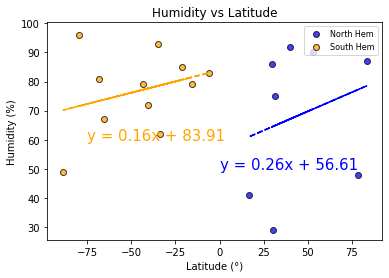

Northern Hemisphere: The r-squared value is: 0.06
Southern Hemisphere: The r-squared value is: 0.09


In [32]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Humidity (%) vs Latitude(°)

#Use dataframe from previous cell: north_df
print(north_df)
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Latitude Humidity"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Latitude Humidity"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="orange", edgecolors="black", alpha=0.75,label="South Hem"); #south hem
# # The y limits of our scatter plot
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #north hem
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #south hem
# # The x limits of our scatter plot 
# plt.xlim(min(x1_values)-5, max(x1_values)+5) #north hem
# plt.xlim(min(x2_values)-5, max(x2_values)+5) #south hem
# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orange") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(0,50),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-75,60),fontsize=15,color="orange") #south hem

#Label title, x-axis and y-axis
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

Northern Hemisphere - Cloudiness (%) vs. Latitude

Southern Hemisphere - Cloudiness (%) vs. Latitude

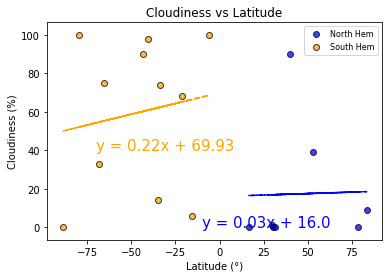

Northern Hemisphere: The r-squared value is: 0.00
Southern Hemisphere: The r-squared value is: 0.02


In [29]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Cloudiness (%) vs Latitude(°)

#Use dataframe from previous cell: north_df, south_df
north_df
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Cloudiness"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Cloudiness"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="orange", edgecolors="black", alpha=0.75,label="South Hem"); #south hem
# # The y limits of our scatter plot
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #north hem
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #south hem
# # The x limits of our scatter plot 
# plt.xlim(min(x1_values)-5, max(x1_values)+5) #north hem
# plt.xlim(min(x2_values)-5, max(x2_values)+5) #south hem
# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orange") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(-10,0),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-70,40),fontsize=15,color="orange") #south hem

#Label title, x-axis and y-axis
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

Northern Hemisphere - Wind Speed (mph) vs. Latitude

Southern Hemisphere - Wind Speed (mph) vs. Latitude

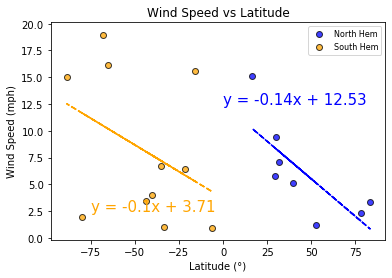

Northern Hemisphere: The r-squared value is: 0.58
Southern Hemisphere: The r-squared value is: 0.15


In [31]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Wind Speed (mph) vs Latitude(°)

#Use dataframe from previous cell: north_df, south_df
north_df
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Wind Speed"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Wind Speed"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="orange", edgecolors="black", alpha=0.75,label="South Hem"); #south hem
# # The y limits of our scatter plot
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #north hem
# plt.ylim(min(y1_values)-5, max(y1_values)+5) #south hem
# # The x limits of our scatter plot 
# plt.xlim(min(x1_values)-5, max(x1_values)+5) #north hem
# plt.xlim(min(x2_values)-5, max(x2_values)+5) #south hem
# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orange") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(0,12.5),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-75,2.5),fontsize=15,color="orange") #south hem

#Label title, x-axis and y-axis
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem